In [1]:
#!pip install nltk

In [2]:
#!pip install beautifulsoup4

In [3]:
#!pip install lxml

In [4]:
#!pip install gensim

In [5]:
#!pip install xlrd

In [6]:
#!pip install textmining

In [7]:
#nltk.download()

In [1]:
#from bs4 import BeautifulSoup

In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import re
import scipy

otto=pd.read_excel('leuphana_datensatz.xlsx',encoding='utf8')
otto.head(10)

searchterm  product_id  \
0   waschmaschine   360700745   
1            vans   555220815   
2    schreibtisch   403881979   
3       trampolin   495982357   
4  spiegelschrank   536509117   
5        sekretär   495873227   
6    schreibtisch   377847434   
7  wohnlandschaft   414199115   
8   beistelltisch   165353551   
9          schirm   419663321   

                                        product_name  \
0  Privileg Waschmaschine Toplader PWT 3525, A+, ...   
1                                       Vans T-Shirt   
2                                Schreibtisch »8048«   
3  4Uniq Trampolin, Ø 305 cm, inkl. Sicherheitsne...   
4             Spiegelschrank »Junior« Breite 31,5 cm   
5                     Loberon Tischsekretär »Lovell«   
6                                 Wimex Schreibtisch   
7                 Innocent Wohnlandschaft »Serlas-U«   
8                                      Beistelltisch   
9  Euroschirm® Regenschirm für Herren, »Herren-St...   

                                 product_description  \
0  Die PWT 3525 ist eine Toplader-Waschmaschine v...   
1  Das T-Shirt von Vans begeistert mit seinem aut...   
2  Schreibtisch mit ergonomisch geformter Tischpl...   
3  4Uniq Trampolin, Ø 305 cm, inkl. Sicherheitsne...   
4  <p><b>Produktdetails</b></p><ul><li>Serienname...   
5  Tischsekretär Lovell<br> <br> Der hölzerne Tis...   
6  Modernes Jugendzimmerprogramm. Pflegeleichte K...   
7  Wohnlandschaft Serlas-U<br> <br> Jede Menge Pl...   
8  Untergestell aus Stahlrohr, verchromt, gehärte...   
9  Gegen jeden Wetterumschwung gewappnet sind Her...   

                               product_sellingpoints  
0  <sellingPoints xmlns:rp="http://www.otto.de/sc...  
1  <sellingPoints xmlns:rp="http://www.otto.de/sc...  
2  <sellingPoints xmlns:rp="http://www.otto.de/sc...  
3  <sellingPoints xmlns:rp="http://www.otto.de/sc...  
4  <sellingPoints xmlns:rp="http://www.otto.de/sc...  
5  <sellingPoints xmlns:rp="http://www.otto.de/sc...  
6  <sellingPoints xmlns:rp="http://www.otto.de/sc...  
7  <sellingPoints xmlns:rp="http://www.otto.de/sc...  
8  <sellingPoints xmlns:rp="http://www.otto.de/sc...  
9  <sellingPoints xmlns:rp="http://www.otto.de/sc...

In [2]:
#Cleaning FUNCTION
def clean (x):    
    #change to lower case
    x=x.str.lower()

    #Remove nulls
    x = x[~pd.isnull(x)]
    x.index=range(len(x))


    z = pd.Series(scipy.zeros(len(x)))
    for i in range(len(x)):
        z[i] = re.sub("<.*?>",' ',x[i])
        z[i] = re.sub("\xBB.*?\xAB",' ',z[i])  #  clensing  "».*?« "
        z[i] = re.sub(r'[?|$|*|:|>|<|=|,|\|/|"|(|)|.|+|!|-|[0-9]',' ',z[i])
    

    #tokenize
    y = pd.Series(scipy.zeros(len(z)))
    for i in range(len(z)):
        y[i] = word_tokenize(z[i])
       
    #remove words less than 2 characters
    for j in range(len(y)):
        for i in range(len(y[j])):
            if len(y[j][i])<3:
                y[j][i]=""
        
    #remove stop and exclude words
    exclude_words= set(('ja','nein','cm','mehr','oben','immer','bitte','sellingpoints',''))
    stop = set(stopwords.words("german"))
    stops=stop|exclude_words

    w= pd.Series(scipy.zeros(len(y)))
    for j in range(len(y)):
        w[j]=[i for i in y[j] if i not in stops]
    return w

In [3]:
#########Keywords by search term
setterm='ski'
#change to lower case
otto.searchterm=otto.searchterm.str.lower()

pd.set_option('display.max_rows', len(otto.searchterm))


In [4]:
#clean description and product name data
clean_description=clean(otto[otto.searchterm==setterm]['product_description'])
clean_product_name=clean(otto[otto.searchterm==setterm]['product_name'])


In [5]:
#clean selling points data
clean_selling_point=clean(otto[otto.searchterm==setterm]['product_sellingpoints'])

In [6]:
#join outputs
join_descriptions = clean_description.apply(pd.Series).stack().reset_index(drop=True)

join_product_name = clean_product_name.apply(pd.Series).stack().reset_index(drop=True)

join_selling_point = clean_selling_point.apply(pd.Series).stack().reset_index(drop=True)

join_total_output = pd.concat([join_descriptions,join_product_name,join_selling_point])

In [7]:
#Show results(description) by column
results_description = pd.crosstab(join_descriptions, columns="count")  

results_description.sort_values(by=['count'], ascending=False).head(7)

col_0      count
row_0           
polyester     49
lego®         45
ski-          45
uvex          44
material      44
details       44
ski           41

In [8]:
#Show results(product name) by column


results_product = pd.crosstab(join_product_name, columns="count")  
results_product.sort_values(by=['count'], ascending=False).head(7)

col_0          count
row_0               
ski               55
snowboardhelm     28
uvex              21
trigema           12
alpina             9
langarm            8
sport              8

In [9]:
#Show results(selling point)  by column
results_selling_points = pd.crosstab(join_selling_point, columns="count")  
results_selling_points.sort_values(by=['count'], ascending=False).head(7)

col_0              count
row_0                   
modelljahr            30
belüftungssystem      13
abnehmbare            12
innenausstattung      12
kopfbandhalterung     11
nackenwärmer          10
ohrpads               10

In [10]:
# Results total output
results = pd.crosstab(join_total_output, columns="count")  

results.sort_values(by=['count'], ascending=False).head(12)

col_0         count
row_0              
ski              96
uvex             65
lego®            59
polyester        58
material         48
system           47
ski-             47
details          44
tec              40
helm             38
snowboard        37
nackenwärmer     36

In [11]:
#####################################NEW TEILEEEEEEEEEEEEEE#################################

In [12]:
##############DO SIMPLE
def dopic (setterm,method,N):
    otto.searchterm=otto.searchterm.str.lower()
    #clean description and product name data
    clean_description=clean(otto[otto.searchterm==setterm]['product_description'])
    clean_product_name=clean(otto[otto.searchterm==setterm]['product_name'])
    #clean selling points data
    clean_selling_point=clean(otto[otto.searchterm==setterm]['product_sellingpoints'])


    stt=''
    if method=='all': 
        for i in range(len(clean_product_name)):
            stt += " ".join(clean_product_name[i])+ ' '
            stt += " ".join(clean_description[i])+ ' '
            stt += " ".join(clean_selling_point[i]) + ' '

            
        tokens = nltk.word_tokenize(stt)
        text = nltk.Text(tokens)
        vocanum=pd.Series(text.vocab())
        return text.dispersion_plot(list(vocanum.sort_values(ascending=False).head(N).index)), text.plot(N)
    
    elif method=='name':
        for i in range(len(clean_product_name)):
            stt += " ".join(clean_product_name[i]) + ' '
        
        tokens = nltk.word_tokenize(stt)
        text = nltk.Text(tokens)
        vocanum=pd.Series(text.vocab())
        #For list below#  vocanum.sort_values(ascending=False).head(N).index
        return  text.dispersion_plot(list(vocanum.sort_values(ascending=False).head(N).index)), text.plot(N)
    
    elif method=='description':
        for i in range(len(clean_description)):
            stt += " ".join(clean_description[i])+ ' '
            
        tokens = nltk.word_tokenize(stt)
        text = nltk.Text(tokens)
        vocanum=pd.Series(text.vocab())
        #For list below#  vocanum.sort_values(ascending=False).head(N).index

        return text.dispersion_plot(list(vocanum.sort_values(ascending=False).head(N).index)), text.plot(N)

    elif method=='sellingpoint':
        for i in range(len(clean_selling_point)):
            stt+= " ".join(clean_selling_point[i])+ ' '
        
        tokens = nltk.word_tokenize(stt)
        text= nltk.Text(tokens)
        vocanum=pd.Series(text.vocab())
        #For list below#  vocanum.sort_values(ascending=False).head(N).index

        return text.dispersion_plot(list(vocanum.sort_values(ascending=False).head(N).index)), text.plot(N)

    

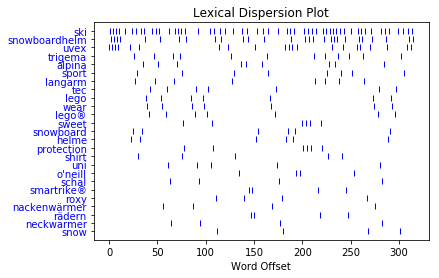

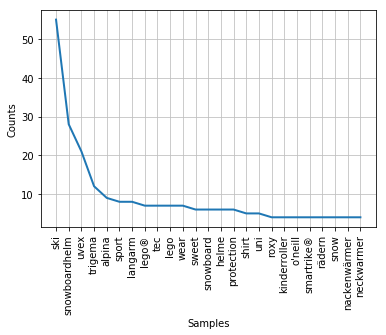

(None, None)

In [13]:
#키워드 by counting
# get keywords by FREQUENCY (COUNT)
#See results easier
dopic('ski','name',25)

In [16]:
######## EXTRACT KEYWORDS by similarity using Word 2Vec ###########################

# Word2Vec embedding
from gensim.models import Word2Vec

def easy_word2vec (setterm,method,N):
    otto.searchterm=otto.searchterm.str.lower()
    #clean description and product name data
    clean_description=clean(otto[otto.searchterm==setterm]['product_description'])
    clean_product_name=clean(otto[otto.searchterm==setterm]['product_name'])
    #clean selling points data
    clean_selling_point=clean(otto[otto.searchterm==setterm]['product_sellingpoints'])
    
    if method=='all': 
        temp=clean_description+clean_selling_point+clean_product_name
        a = temp.values.tolist()
        a = [a for a in a if str(a) != 'nan']
        modeltest = Word2Vec(a,min_count=5,size=5,workers=4)
        #return modeltest.most_similar(positive=setterm,topn=N) 
        return modeltest.most_similar_cosmul(positive=setterm,topn=N) 
    
    elif method=='name':
        a=clean_product_name.values.tolist()
        modeltest = Word2Vec(a,min_count=3,size=8,workers=4)
        return modeltest.most_similar(positive=setterm,topn=N) 
    elif method=='description':        
        a=clean_description.values.tolist()
        modeltest = Word2Vec(a,min_count=1,size=5,workers=4)
        return modeltest.most_similar(positive=setterm,topn=N)
    elif method=='sellingpoint':
        a=clean_selling_point.values.tolist()
        modeltest = Word2Vec(a,min_count=1,size=5,workers=4)
        return modeltest.most_similar(positive=setterm,topn=N)       

c:\python27amd64\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [17]:
#키워드구하기 유사성기반
#get keywords using word2vec similarity
easy_word2vec('ski','name',25)

[(u'lego\xae', 0.6298536658287048),
 (u'uni', 0.5808403491973877),
 (u'wear', 0.464836061000824),
 (u'uvex', 0.4438158869743347),
 (u'sport-rolli', 0.35570424795150757),
 (u'jacke', 0.3248083293437958),
 (u'nackenw\xe4rmer', 0.17447996139526367),
 (u'protection', 0.15127724409103394),
 (u'sport', 0.128646582365036),
 (u'tec', 0.10713516920804977),
 (u'langarm', 0.07495526969432831),
 (u'smartrike\xae', 0.04931016266345978),
 (u'r\xe4dern', 0.04851675033569336),
 (u'fleece', 0.04270510375499725),
 (u'neckwarmer', 0.02730603888630867),
 (u'alpina', 0.024420879781246185),
 (u'snowboard', 0.019928909838199615),
 (u'lang', -0.00854414887726307),
 (u'snow', -0.04125306010246277),
 (u'helme', -0.1160547286272049),
 (u'skihose', -0.1571417897939682),
 (u'shirt', -0.16754862666130066),
 (u'trigema', -0.19515717029571533),
 (u'roxy', -0.21273088455200195),
 (u"o'neill", -0.2166062742471695)]

In [18]:
########################APPROACH2 ####################

In [19]:
#word2vec 훈련하기 / 파라미터체크
#Train word2vec /  parameter check!!

setterm='ski'
clean_description=clean(otto[otto.searchterm==setterm]['product_description'])
clean_product_name=clean(otto[otto.searchterm==setterm]['product_name'])

#a=clean_description.values.tolist()
#a=clean_product_name

a=clean_description
    

#b=clean(otto['product_description'])

In [20]:
modeltest = Word2Vec(a,min_count=1,size=5,workers=4)

In [21]:
# 유니크 워드 개수 구할것
#get all vectors of the distict words!!
seen = set()
result = []
for item in modeltest.wv.vocab.keys():
    if item not in seen:
        seen.add(item)
        result.append(item)

len(result)

1560

In [22]:
#거리행렬 구하기 
#GET DISTANCE MATRIX
import sys
sys.setrecursionlimit(100000000)

from scipy.spatial import distance_matrix


X=[]
for i in result:
    X.append(modeltest[i].tolist())

#정규화 필요한경우만 아래라인 쓸것
#when need to normalize, use below line
#X = StandardScaler().fit_transform(X)

cor=pd.DataFrame(data=X,index=modeltest.wv.vocab.keys())

distance=pd.DataFrame(distance_matrix(cor.values, cor.values), index=cor.index, columns=cor.index)
distance


zweilagen       all  schutzausrüstung  \
zweilagen                        0.000000  0.167599          0.166892   
all                              0.167599  0.000000          0.164074   
schutzausrüstung                 0.166892  0.164074          0.000000   
snowboardhose                    0.196164  0.160981          0.184278   
infraroter                       0.232995  0.225827          0.116428   
abfahrt                          0.284602  0.249984          0.170328   
nichttextile                     0.099289  0.129358          0.162979   
materialzusammensetzung          0.152044  0.112498          0.102855   
schöne                           0.186535  0.063757          0.142679   
farben                           0.182416  0.191274          0.180751   
drauf                            0.227776  0.165250          0.172203   
schützt                          0.240425  0.140318          0.173619   
ergo                             0.225947  0.076391          0.168001   
mäßig                            0.195999  0.200018          0.159016   
neue                             0.260521  0.159296          0.157841   
hervorragend                     0.152180  0.143005          0.189333   
gerade                           0.118732  0.201915          0.196000   
verschiedenen                    0.172379  0.224771          0.145884   
alpina                           0.235796  0.202456          0.104417   
entsprechende                    0.169450  0.120894          0.167856   
snowflakes                       0.171233  0.165149          0.100606   
single-jersey                    0.225060  0.160448          0.156908   
high-tech-konstruktion           0.170104  0.205220          0.197333   
qualität                         0.217386  0.138467          0.179304   
sprüngen                         0.231241  0.240682          0.134343   
anfang                           0.139471  0.204386          0.125437   
cmp                              0.223325  0.172765          0.131805   
fällt                            0.151491  0.196423          0.075002   
wärmender                        0.212147  0.169438          0.140900   
innenmaterial                    0.164463  0.167621          0.084792   
trifft                           0.190725  0.256672          0.138842   
spezialmembran                   0.131676  0.148999          0.068299   
thermoplastisch                  0.158433  0.223933          0.165215   
sport-shirt                      0.150304  0.212228          0.142631   
kragen                           0.203543  0.156888          0.206304   
achsen                           0.193122  0.141851          0.175491   
austauschbares                   0.253009  0.231758          0.193273   
aktive                           0.183651  0.190039          0.152600   
neu                              0.051946  0.187688          0.185273   
gipfeln                          0.126222  0.163775          0.076125   
aktiviert                        0.177036  0.170591          0.205216   
reinigung                        0.246826  0.235521          0.232219   
drei                             0.125610  0.112395          0.168677   
protection                       0.193485  0.110109          0.197566   
aktiviere                        0.160953  0.086209          0.184548   
interne                          0.142836  0.166199          0.237454   
aufleben                         0.234017  0.137151          0.186843   
kids                             0.163231  0.209038          0.177776   
optimaler                        0.115324  0.159995          0.113255   
nässe                            0.191901  0.214400          0.148154   
hardshell-konstruktion           0.114233  0.138239          0.226967   
gesichtspolster                  0.240059  0.216830          0.095699   
pack                             0.185230  0.150459          0.066440   
funktionshose                    0.143755  0.209038          0.141811   
antimikrobieller 

In [23]:
#import math
#distance=pd.DataFrame(index=cor.index, columns=cor.index)
#for i in range(len(cor.index)):
#    for j in range(len(cor.index)):
#        dtm.iloc[i,j]=scipy.spatial.distance.euclidean(cor.iloc[i,],cor.iloc[j,])



In [24]:
# 가중치 행렬 구하기
# get weighted matrix
import math

#weighted=np.exp(-pow(distance,3)/100)
weighted=-(pow(distance,2))
weighted

zweilagen       all  schutzausrüstung  \
zweilagen                       -0.000000 -0.028089         -0.027853   
all                             -0.028089 -0.000000         -0.026920   
schutzausrüstung                -0.027853 -0.026920         -0.000000   
snowboardhose                   -0.038481 -0.025915         -0.033958   
infraroter                      -0.054287 -0.050998         -0.013555   
abfahrt                         -0.080998 -0.062492         -0.029012   
nichttextile                    -0.009858 -0.016734         -0.026562   
materialzusammensetzung         -0.023117 -0.012656         -0.010579   
schöne                          -0.034795 -0.004065         -0.020357   
farben                          -0.033276 -0.036586         -0.032671   
drauf                           -0.051882 -0.027307         -0.029654   
schützt                         -0.057804 -0.019689         -0.030144   
ergo                            -0.051052 -0.005836         -0.028224   
mäßig                           -0.038416 -0.040007         -0.025286   
neue                            -0.067871 -0.025375         -0.024914   
hervorragend                    -0.023159 -0.020450         -0.035847   
gerade                          -0.014097 -0.040770         -0.038416   
verschiedenen                   -0.029714 -0.050522         -0.021282   
alpina                          -0.055600 -0.040988         -0.010903   
entsprechende                   -0.028713 -0.014615         -0.028176   
snowflakes                      -0.029321 -0.027274         -0.010122   
single-jersey                   -0.050652 -0.025743         -0.024620   
high-tech-konstruktion          -0.028935 -0.042115         -0.038940   
qualität                        -0.047257 -0.019173         -0.032150   
sprüngen                        -0.053472 -0.057928         -0.018048   
anfang                          -0.019452 -0.041774         -0.015734   
cmp                             -0.049874 -0.029848         -0.017373   
fällt                           -0.022949 -0.038582         -0.005625   
wärmender                       -0.045006 -0.028709         -0.019853   
innenmaterial                   -0.027048 -0.028097         -0.007190   
trifft                          -0.036376 -0.065881         -0.019277   
spezialmembran                  -0.017338 -0.022201         -0.004665   
thermoplastisch                 -0.025101 -0.050146         -0.027296   
sport-shirt                     -0.022591 -0.045041         -0.020343   
kragen                          -0.041430 -0.024614         -0.042561   
achsen                          -0.037296 -0.020122         -0.030797   
austauschbares                  -0.064014 -0.053712         -0.037354   
aktive                          -0.033728 -0.036115         -0.023287   
neu                             -0.002698 -0.035227         -0.034326   
gipfeln                         -0.015932 -0.026822         -0.005795   
aktiviert                       -0.031342 -0.029101         -0.042113   
reinigung                       -0.060923 -0.055470         -0.053926   
drei                            -0.015778 -0.012633         -0.028452   
protection                      -0.037436 -0.012124         -0.039032   
aktiviere                       -0.025906 -0.007432         -0.034058   
interne                         -0.020402 -0.027622         -0.056384   
aufleben                        -0.054764 -0.018810         -0.034910   
kids                            -0.026644 -0.043697         -0.031604   
optimaler                       -0.013300 -0.025598         -0.012827   
nässe                           -0.036826 -0.045968         -0.021950   
hardshell-konstruktion          -0.013049 -0.019110         -0.051514   
gesichtspolster                 -0.057628 -0.047015         -0.009158   
pack                            -0.034310 -0.022638         -0.004414   
funktionshose                   -0.020665 -0.043697         -0.020110   
antimikrobieller 

In [25]:
# (혹은 DTM ) 선언
# decloare  DTM
dtm=pd.DataFrame(index=otto[otto.searchterm==setterm]['product_id'].values, columns = modeltest.wv.vocab.keys())

In [26]:
#make document TERM MATRIX   by each products 
for i in range(len(dtm.index)):
    for j in range(len(dtm.columns)):
        dtm.iloc[i,j]=a[i].count(dtm.columns.values[j])
dtm

zweilagen all schutzausrüstung snowboardhose infraroter abfahrt  \
567164035         0   0                0             0          0       0   
567164037         0   0                0             0          0       0   
567164036         0   0                0             0          0       0   
567164050         0   0                0             0          0       0   
404876610         0   0                0             0          0       0   
569004082         1   0                0             0          0       0   
600026825         0   0                0             0          0       0   
410851795         0   0                0             0          0       0   
357294846         0   0                0             0          0       0   
449368488         0   0                0             0          0       0   
565352153         0   0                0             0          0       0   
453972461         0   0                0             0          0       0   
357294860         0   0                0             0          0       0   
565352146         0   0                0             0          0       1   
562631069         0   0                0             0          0       0   
357330574         0   0                0             0          0       0   
565352188         0   0                0             0          0       0   
363015267         0   0                0             0          0       0   
546527488         0   0                0             0          0       0   
525417236         0   0                0             0          0       0   
453971463         0   0                0             0          0       0   
560117183         0   0                0             0          0       0   
570677578         0   0                0             0          0       0   
564364213         0   0                0             0          0       0   
567164033         0   1                0             0          0       0   
559643523         0   0                0             0          0       0   
507054866         0   0                0             0          0       0   
357774328         0   0                0             0          0       0   
549952818         0   0                0             1          0       0   
571381973         0   0                0             0          0       0   
565352164         0   0                0             0          0       0   
564825522         0   0                0             0          0       0   
565352144         0   0                0             0          0       1   
536858295         0   0                1             0          0       0   
536858257         0   0                1             0          0       0   
432645182         0   0                0             0          0       0   
498787929         0   0                0             0          0       0   
565352163         0   0                0             0          0       0   
600026671         0   0                0             0          0       0   
357774317         0   0                0             0          0       0   
502534222         0   0                0             0          0       0   
564362182         0   0                0             0          0       0   
449368566         0   0                0             0          0       0   
546527361         0   1                0             0          0       0   
449368489         0   0                0             0          0       0   
571381881         0   0                0             0          0       0   
507054862         0   0                0             0          1       0   
572098695         0   0                0             1          0       0   
546527487         0   0                0             0          0       0   
570677560         0   0                0             0          0       0   
570677584         0   0                0             0          0       0   
357294

In [27]:
#Selected Weighted Matrix
s_weighted=weighted[[u'nackenw\xe4rmer','skihose','jacke','snowboardbrillen','snowboardhelm']]
s_weighted

nackenwärmer   skihose     jacke  \
zweilagen                          -0.013963 -0.002802 -0.025984   
all                                -0.020584 -0.030040 -0.026179   
schutzausrüstung                   -0.051050 -0.021241 -0.016979   
snowboardhose                      -0.043482 -0.031754 -0.021154   
infraroter                         -0.077063 -0.041632 -0.044464   
abfahrt                            -0.110273 -0.073300 -0.067584   
nichttextile                       -0.015252 -0.008841 -0.008514   
materialzusammensetzung            -0.033805 -0.024994 -0.033195   
schöne                             -0.035115 -0.037077 -0.027023   
farben                             -0.059680 -0.032503 -0.009687   
drauf                              -0.054416 -0.040364 -0.007958   
schützt                            -0.056125 -0.053816 -0.049258   
ergo                               -0.048014 -0.051757 -0.031952   
mäßig                              -0.059362 -0.033728 -0.040368   
neue                               -0.080202 -0.061974 -0.024967   
hervorragend                       -0.019196 -0.018661 -0.028842   
gerade                             -0.043763 -0.022414 -0.035999   
verschiedenen                      -0.044337 -0.014443 -0.019179   
alpina                             -0.087250 -0.048218 -0.025413   
entsprechende                      -0.025284 -0.021562 -0.011646   
snowflakes                         -0.045732 -0.020076 -0.016084   
single-jersey                      -0.044972 -0.044875 -0.059476   
high-tech-konstruktion             -0.037307 -0.018515 -0.010874   
qualität                           -0.035813 -0.045315 -0.063013   
sprüngen                           -0.092361 -0.044469 -0.030833   
anfang                             -0.051565 -0.014494 -0.013118   
cmp                                -0.056824 -0.036261 -0.009778   
fällt                              -0.048097 -0.016155 -0.030068   
wärmender                          -0.047438 -0.031783 -0.027346   
innenmaterial                      -0.049065 -0.026664 -0.031399   
trifft                             -0.078928 -0.028965 -0.035738   
spezialmembran                     -0.033967 -0.014523 -0.027112   
thermoplastisch                    -0.062885 -0.032556 -0.054025   
sport-shirt                        -0.038692 -0.011861 -0.029769   
kragen                             -0.046085 -0.047422 -0.063291   
achsen                             -0.050105 -0.043318 -0.048007   
austauschbares                     -0.094602 -0.057282 -0.026406   
aktive                             -0.057542 -0.027907 -0.016242   
neu                                -0.014154 -0.006437 -0.042160   
gipfeln                            -0.033361 -0.007619 -0.010385   
aktiviert                          -0.033766 -0.034737 -0.063590   
reinigung                          -0.074402 -0.052510 -0.044052   
drei                               -0.009442 -0.011787 -0.022110   
protection                         -0.035390 -0.043244 -0.051291   
aktiviere                          -0.025845 -0.029743 -0.016354   
interne                            -0.022782 -0.025933 -0.038474   
aufleben                           -0.045699 -0.049667 -0.051277   
kids                               -0.048228 -0.019148 -0.009014   
optimaler                          -0.031090 -0.007265 -0.007810   
nässe                              -0.048257 -0.027596 -0.054012   
hardshell-konstruktion             -0.006935 -0.018208 -0.037951   
gesichtspolster                    -0.088607 -0.050823 -0.044932   
pack                               -0.058579 -0.030413 -0.012350   
funktionshose                      -0.055840 -0.025127 -0.043928   
antimikrobieller                   -0.079635 -0.054575 -0.016365   
antiallergische                    -0.019833 -0.017467 -0.035160   
verlaufenden                       -0.049190 -0.023402 -0.029738   
hybrid-konstruktion                -0.024435 -0.025579 -0.017158   
abnehmbar           

In [28]:
#FINAL SCORE

temp=pd.DataFrame(otto[otto.searchterm==setterm]['product_name'].values,index=otto[otto.searchterm==setterm]['product_id'].values,columns=['product_name'])
pd.concat([temp,dtm.dot(s_weighted)+10],axis=1)

product_name nackenwärmer  \
567164035                  Uvex Ski - / Snowboardhelm »jimm«      8.16929   
567164037                  Uvex Ski - / Snowboardhelm »jimm«      8.16929   
567164036                  Uvex Ski - / Snowboardhelm »jimm«      8.16929   
567164050             Uvex Ski - / Snowboardhelm »airwing 2«      4.97269   
404876610  Universal CD Conni (feiert Weihnachten/ fährt ...      8.92099   
569004082                   Marmot Outdoorjacke »Free Skier«      3.86246   
600026825                        PIQ Wearables »Ski Zubehör«      7.08219   
410851795      Uvex Helme (Ski + Snowboard) »hlmt 300 visor«      8.54806   
357294846                    TRIGEMA Langarm Ski/Sport Shirt       7.7599   
449368488       Uvex Helme (Ski + Snowboard) »HLMT 5 junior«      8.44705   
565352153          Alpina Ski - / Snowboardhelm »Snowmythos«      5.89567   
453972461  LEGO Wear Fleecemütze LEGO® TEC Hut Ski Mütze ...       7.5516   
357294860                    TRIGEMA Langarm Ski/Sport-Rolli        8.285   
565352146           Alpina Ski - / Snowboardhelm »Snow Tour«      4.14696   
562631069  LEGO Wear Nackenwärmer kurz Fleece LEGO® TEC U...      7.35952   
357330574                    TRIGEMA Langarm Ski/Sport-Rolli        8.285   
565352188               Alpina Ski - / Snowboardhelm »Carat«      7.36375   
363015267                            TRIGEMA Ski/Sport Shirt      8.08714   
546527488   Sweet Protection Ski - / Snowboardhelm »Blaster«      9.00403   
525417236     CMP Skihose »SKI SALOPETTE«, inkl. Hosenträger      8.00932   
453971463  LEGO Wear Nackenwärmer lang LEGO® TEC UNI Ski ...      7.75081   
560117183  LEGO Wear Skihose 8000mm Wassersäule LEGO® TEC...      2.94128   
570677578   Sweet Protection Ski - / Snowboardhelm »Trooper«      6.47022   
564364213                 Roxy Snow Jacke »Jet Ski Gradient«      8.01226   
567164033                  Uvex Ski - / Snowboardhelm »p2us«      3.07171   
559643523                    TOMY AQUA FUN - Ski Boot Krokos      8.57383   
507054866           Uvex Ski- & Snowboardbrillen »skyper LM«      8.56448   
357774328                    TRIGEMA Langarm Ski/Sport Shirt      7.82237   
549952818                  Maier Sports Outdoorhose »Resi 2«      4.91081   
571381973            O'Neill Pullover langärmlig »Retro Ski«       7.6417   
565352164               Alpina Ski - / Snowboardhelm »Spine«      4.77178   
564825522                     Roxy Snowboard-Jacke »Jet Ski«      8.58837   
565352144           Alpina Ski - / Snowboardhelm »Snow Tour«      4.14696   
536858295  SmarTrike® Kinderroller mit 3 Rädern, »Ski Sco...      5.64233   
536858257  SmarTrike® Kinderroller mit 3 Rädern, »Ski Sco...      7.09955   
432645182      Uvex Helme (Ski + Snowboard) »hlmt 300 visor«      8.48902   
498787929    Bettwäsche, Kaeppel, »Ski Elch«, mit Elch-Motiv      7.83481   
565352163               Alpina Ski - / Snowboardhelm »Spine«      4.77178   
600026671                            PIQ Wearables »Ski Set«        2.974   
357774317                     TRIGEMA Ski/Sport Träger-Shirt      8.09925   
502534222  LEGO Wear Nackenwärmer lang Fleece LEGO® TEC U...       7.3361   
564362182                          Roxy Snow Jacke »Jet Ski«      8.08422   
449368566       Uvex Helme (Ski + Snowboard) »Airwing 2 pro«      8.52341   
546527361                  Uvex Ski - / Snowboardhelm »p2us«      3.07171   
449368489            Uvex Helme (Ski + Snowboard) »p1us pro«      8.63664   
571381881               O'Neill Wintersportjacke »Retro Ski«      7.34502   
507054862   Uvex Ski- & Snowboardbrillen »Downhill 2000 VFM«      6.72142   
572098695                  O'Neill Snowboardhose »Retro Ski«      7.66023   
546527487   Sweet Protection Ski - / Snowboardhelm »Blaster«      9.00403   
570677560  Sweet Protection Ski - / Snowboardhelm »Blaste...      5.87946   
570677584  Sweet Protection Ski - / Snowboardhelm »Blaste...      5.35674   
357294708                    TRIGEMA Langarm

In [75]:
######### DBSCAN AREA #############  ####################################### APPROACH 1
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from gensim.models import Word2Vec

In [76]:
#이름로드하기
# get all words in the product name

setterm='ski'
#clean_description=clean(otto[otto.searchterm==setterm]['product_description'])
clean_product_name=clean(otto[otto.searchterm==setterm]['product_name'])
a=clean_product_name
modeltest = Word2Vec(a,min_count=1,size=1,workers=4)

In [77]:
wobmatrix=pd.DataFrame(columns=modeltest.wv.vocab.keys(),index=otto[otto.searchterm==setterm]['product_name'])

In [78]:
#make WOB for each product
for i in range(len(wobmatrix.index)):
    for j in range(len(wobmatrix.columns)):
        wobmatrix.iloc[i,j]=a[i].count(wobmatrix.columns.values[j])
wobmatrix

outdoorhose feiert lego®  \
product_name                                                                  
Uvex Ski - / Snowboardhelm »jimm«                            0      0     0   
Uvex Ski - / Snowboardhelm »jimm«                            0      0     0   
Uvex Ski - / Snowboardhelm »jimm«                            0      0     0   
Uvex Ski - / Snowboardhelm »airwing 2«                       0      0     0   
Universal CD Conni (feiert Weihnachten/ fährt Ski)           0      1     0   
Marmot Outdoorjacke »Free Skier«                             0      0     0   
PIQ Wearables »Ski Zubehör«                                  0      0     0   
Uvex Helme (Ski + Snowboard) »hlmt 300 visor«                0      0     0   
TRIGEMA Langarm Ski/Sport Shirt                              0      0     0   
Uvex Helme (Ski + Snowboard) »HLMT 5 junior«                 0      0     0   
Alpina Ski - / Snowboardhelm »Snowmythos«                    0      0     0   
LEGO Wear Fleecemütze LEGO® TEC Hut Ski Mütze S...           0      0     1   
TRIGEMA Langarm Ski/Sport-Rolli                              0      0     0   
Alpina Ski - / Snowboardhelm »Snow Tour«                     0      0     0   
LEGO Wear Nackenwärmer kurz Fleece LEGO® TEC UN...           0      0     1   
TRIGEMA Langarm Ski/Sport-Rolli                              0      0     0   
Alpina Ski - / Snowboardhelm »Carat«                         0      0     0   
TRIGEMA Ski/Sport Shirt                                      0      0     0   
Sweet Protection Ski - / Snowboardhelm »Blaster«             0      0     0   
CMP Skihose »SKI SALOPETTE«, inkl. Hosenträger               0      0     0   
LEGO Wear Nackenwärmer lang LEGO® TEC UNI Ski S...           0      0     1   
LEGO Wear Skihose 8000mm Wassersäule LEGO® TEC ...           0      0     1   
Sweet Protection Ski - / Snowboardhelm »Trooper«             0      0     0   
Roxy Snow Jacke »Jet Ski Gradient«                           0      0     0   
Uvex Ski - / Snowboardhelm »p2us«                            0      0     0   
TOMY AQUA FUN - Ski Boot Krokos                              0      0     0   
Uvex Ski- & Snowboardbrillen »skyper LM«                     0      0     0   
TRIGEMA Langarm Ski/Sport Shirt                              0      0     0   
Maier Sports Outdoorhose »Resi 2«                            1      0     0   
O'Neill Pullover langärmlig »Retro Ski«                      0      0     0   
Alpina Ski - / Snowboardhelm »Spine«                         0      0     0   
Roxy Snowboard-Jacke »Jet Ski«                               0      0     0   
Alpina Ski - / Snowboardhelm »Snow Tour«                     0      0     0   
SmarTrike® Kinderroller mit 3 Rädern, »Ski Scoo...           0      0     0   
SmarTrike® Kinderroller mit 3 Rädern, »Ski Scoo...           0      0     0   
Uvex Helme (Ski + Snowboard) »hlmt 300 visor«                0      0     0   
Bettwäsche, Kaeppel, »Ski Elch«, mit Elch-Motiv              0      0     0   
Alpina Ski - / Snowboardhelm »Spine«                         0      0     0   
PIQ Wearables »Ski Set«                                      0      0     0   
TRIGEMA Ski/Sport Träger-Shirt                               0      0     0   
LEGO Wear Nackenwärmer lang Fleece LEGO® TEC UN...           0      0     1   
Roxy Snow Jacke »Jet Ski«                                    0      0     0   
Uvex Helme (Ski + Snowboard) »Airwing 2 pro«                 0      0     0   
Uvex Ski - / Snowboardhelm »p2us«                            0      0     0   
Uvex Helme (Ski + Snowboard) »p1us pro«                      0      0     0   
O'Neill Wintersportjacke »Retro Ski«                         0      0     0   
Uvex Ski- & Snowboardbrillen »Downhill 2000 VFM«             0      0     0   
O'Neill Snowboardhose »Retro Ski«                            0      0     0   
Sweet Protection Ski - / Snowboardhelm »Blaster«             0      0     0   
Sweet Protection Ski -

In [79]:
#  PCA통해서 차원축소함 시각화위해서
# Dimension ↓ , in order to see the result in 2D
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(wobmatrix)
X = pca.transform(wobmatrix)

In [80]:
# go DBSCAN  (manipulate eps and min_samples to get good results)
db = DBSCAN(eps=0.4, min_samples=1).fit(X)
db.labels_


array([0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 3, 2, 0, 4, 2, 0, 2, 0, 2, 4, 3, 0,
       2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 4, 2, 0, 0, 0, 2,
       1, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 4,
       0, 0, 3, 2, 0, 2, 0], dtype=int64)

In [109]:
#See result of dbscan
pd.set_option('display.max_rows', len(db.labels_))
temp=pd.DataFrame(db.labels_.tolist())
#.sort_values(by=[0],ascending=False)


In [90]:
# SEE THE Result of DBscan
dbscanresult=pd.concat([pd.DataFrame(wobmatrix.index),temp],axis=1)
dbscanresult.sort_values(by=[0],ascending=False)


product_name  0
14  LEGO Wear Nackenwärmer kurz Fleece LEGO® TEC U...  4
20  LEGO Wear Nackenwärmer lang LEGO® TEC UNI Ski ...  4
40  LEGO Wear Nackenwärmer lang Fleece LEGO® TEC U...  4
68  LEGO Wear Nackenwärmer lang Fleece LEGO® TEC U...  4
21  LEGO Wear Skihose 8000mm Wassersäule LEGO® TEC...  3
71  LEGO Wear Skihose 8000mm Wassersäule LEGO® TEC...  3
11  LEGO Wear Fleecemütze LEGO® TEC Hut Ski Mütze ...  3
38                            PIQ Wearables »Ski Set«  2
29            O'Neill Pullover langärmlig »Retro Ski«  2
31                     Roxy Snowboard-Jacke »Jet Ski«  2
33  SmarTrike® Kinderroller mit 3 Rädern, »Ski Sco...  2
34  SmarTrike® Kinderroller mit 3 Rädern, »Ski Sco...  2
62            O'Neill Pullover langärmlig »Retro Ski«  2
36    Bettwäsche, Kaeppel, »Ski Elch«, mit Elch-Motiv  2
60  SmarTrike® Kinderroller mit 3 Rädern, »Ski Sco...  2
61  TRIGEMA Lange Ski/Sport Funktionshose Merinowolle  2
27                    TRIGEMA Langarm Ski/Sport Shirt  2
39                     TRIGEMA Ski/Sport Träger-Shirt  2
41                          Roxy Snow Jacke »Jet Ski«  2
58                    TRIGEMA Langarm Ski/Sport Shirt  2
45               O'Neill Wintersportjacke »Retro Ski«  2
47                  O'Neill Snowboardhose »Retro Ski«  2
54                    TRIGEMA Langarm Ski/Sport Shirt  2
51                    TRIGEMA Langarm Ski/Sport-Rolli  2
28                  Maier Sports Outdoorhose »Resi 2«  2
52  SmarTrike® Kinderroller mit 3 Rädern, »Ski Sco...  2
17                            TRIGEMA Ski/Sport Shirt  2
8                     TRIGEMA Langarm Ski/Sport Shirt  2
65                    TRIGEMA Langarm Ski/Sport-Rolli  2
23                 Roxy Snow Jacke »Jet Ski Gradient«  2
74                   Ziener Hose »ARE jun (pant ski)«  2
66                    Roxy Snow Jacke »Jet Ski Solid«  2
6                         PIQ Wearables »Ski Zubehör«  2
19     CMP Skihose »SKI SALOPETTE«, inkl. Hosenträger  2
5                    Marmot Outdoorjacke »Free Skier«  2
15                    TRIGEMA Langarm Ski/Sport-Rolli  2
72  TRIGEMA Lange Ski/Sport Funktionshose Merinowolle  2
12                    TRIGEMA Langarm Ski/Sport-Rolli  2
4   Universal CD Conni (feiert Weihnachten/ fährt ...  1
26           Uvex Ski- & Snowboardbrillen »skyper LM«  1
25                    TOMY AQUA FUN - Ski Boot Krokos  1
46   Uvex Ski- & Snowboardbrillen »Downhill 2000 VFM«  1
56                Uvex Ski - / Snowboardhelm »hlmt 5«  0
55               Alpina Ski - / Snowboardhelm »Cheos«  0
73                 Uvex Ski - / Snowboardhelm »JAKK+«  0
53   Sweet Protection Ski - / Snowboardhelm »Blaster«  0
57               Alpina Ski - / Snowboardhelm »Scara«  0
59            Uvex Ski - / Snowboardhelm »jimm octo+«  0
69       Alpina Ski - / Snowboardhelm »Grap Visor HM«  0
67            Uvex Ski - / Snowboardhelm »jimm octo+«  0
63           Uvex Ski - / Snowboardhelm »hlmt 5 core«  0
64              Uvex Ski - / Snowboardhelm »gamma WL«  0
70                Uvex Helme (Ski + Snowboard) »p1us«  0
0                   Uvex Ski - / Snowboardhelm »jimm«  0
50  Sweet Protection Ski - / Snowboardhelm »Blaste...  0
49  Sweet Protection Ski - / Snowboardhelm »Blaste...  0
2                   Uvex Ski - / Snowboardhelm »jimm«  0
3              Uvex Ski - / Snowboardhelm »airwing 2«  0
7       Uvex Helme (Ski + Snowboard) »hlmt 300 visor«  0
9        Uvex Helme (Ski + Snowboard) »HLMT 5 junior«  0
10          Alpina Ski - / Snowboardhelm »Snowmythos«  0
13           Alpina Ski - / Snowboardhelm »Snow Tour«  0
16               Alpina Ski - / Snowboardhelm »Carat«  0
18   Sweet Protection Ski - / Snowboardhelm »Blaster«  0
22   Sweet Protection Ski - / Snowboardhelm »Trooper«  0
24                  Uvex Ski - / Snowboardhelm »p2us«  0
30               Alpina Ski - / Snowboardhelm »Spine«  0
32           Alpina Ski - / Snowboardhelm »Snow Tour«  0
35      Uvex Helme (Ski + Snowboard) »hlmt 300 visor«  0
37               Alpina Ski - / Snowboardhelm »Spin

In [85]:
#WHICH  words  frequently appear in the each product
extract_dbscan=pd.concat([temp,pd.DataFrame(wobmatrix.values,columns=wobmatrix.columns)],axis=1)
extract_dbscan

0 outdoorhose feiert lego® maier roxy wearables outdoorjacke  \
0   0           0      0     0     0    0         0            0   
1   0           0      0     0     0    0         0            0   
2   0           0      0     0     0    0         0            0   
3   0           0      0     0     0    0         0            0   
4   1           0      1     0     0    0         0            0   
5   2           0      0     0     0    0         0            1   
6   2           0      0     0     0    0         1            0   
7   0           0      0     0     0    0         0            0   
8   2           0      0     0     0    0         0            0   
9   0           0      0     0     0    0         0            0   
10  0           0      0     0     0    0         0            0   
11  3           0      0     1     0    0         0            0   
12  2           0      0     0     0    0         0            0   
13  0           0      0     0     0    0         0            0   
14  4           0      0     1     0    0         0            0   
15  2           0      0     0     0    0         0            0   
16  0           0      0     0     0    0         0            0   
17  2           0      0     0     0    0         0            0   
18  0           0      0     0     0    0         0            0   
19  2           0      0     0     0    0         0            0   
20  4           0      0     1     0    0         0            0   
21  3           0      0     1     0    0         0            0   
22  0           0      0     0     0    0         0            0   
23  2           0      0     0     0    1         0            0   
24  0           0      0     0     0    0         0            0   
25  1           0      0     0     0    0         0            0   
26  1           0      0     0     0    0         0            0   
27  2           0      0     0     0    0         0            0   
28  2           1      0     0     1    0         0            0   
29  2           0      0     0     0    0         0            0   
30  0           0      0     0     0    0         0            0   
31  2           0      0     0     0    1         0            0   
32  0           0      0     0     0    0         0            0   
33  2           0      0     0     0    0         0            0   
34  2           0      0     0     0    0         0            0   
35  0           0      0     0     0    0         0            0   
36  2           0      0     0     0    0         0            0   
37  0           0      0     0     0    0         0            0   
38  2           0      0     0     0    0         1            0   
39  2           0      0     0     0    0         0            0   
40  4           0      0     1     0    0         0            0   
41  2           0      0     0     0    1         0            0   
42  0           0      0     0     0    0         0            0   
43  0           0      0     0     0    0         0            0   
44  0           0      0     0     0    0         0            0   
45  2           0      0     0     0    0         0            0   
46  1           0      0     0     0    0         0            0   
47  2           0      0     0     0    0         0            0   
48  0           0      0     0     0    0         0            0   
49  0           0      0     0     0    0         0            0   
50  0           0      0     0     0    0         0            0   
51  2           0      0     0     0    0         0            0   
52  2           0      0     0     0    0         0            0   
53  0           0      0     0     0    0         0            0   
54  2           0      0     0     0    0         0            0   
55  0           0      0     0     0    0         0            0   
56  0           0      0     0     0    0         0            0   
57  0           0      0     0     0    0         0         

In [106]:
#WHICH  words  frequently appear in the each subgroup
temp2=extract_dbscan.groupby(extract_dbscan[0]).sum()
temp2=temp2.drop(setterm,axis=1)


In [112]:
# How many times  
temp2.max(axis=1)

0
0    28
1     2
2    12
3     3
4     4
dtype: int64

In [113]:
# what is the word of most freqent? in each subgroup?
# IT CAN BE USED FOR the subgroup keywords?
temp2.idxmax(axis=1)

0
0       snowboardhelm
1    snowboardbrillen
2             trigema
3               lego®
4               lego®
dtype: object

Estimated number of clusters: 5


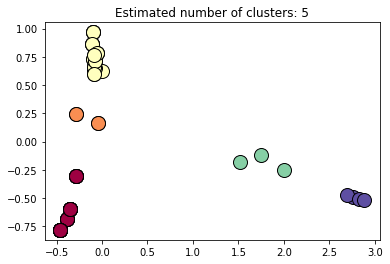

In [25]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [39]:
#########################################EXTRACT KEYWORD USING RANDOM FOREST #######

In [40]:
from gensim.models import Word2Vec

clean_product_name=clean(otto['product_name'])
a=clean_product_name
modeltest = Word2Vec(a,min_count=1,size=1,workers=4)

In [41]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
data = a.tolist()
mlb.fit_transform(data)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
##  WOB binary matrix of all product_name
pd.set_option('display.max_columns', 100)

woball=pd.DataFrame(mlb.fit_transform(data),index=otto.searchterm,columns=mlb.classes_.tolist())
woball


'bud  'calvin  'hi  -ac  -air  -arm  -arm-shirt  \
searchterm                                                                 
waschmaschine               0        0    0    0     0     0           0   
vans                        0        0    0    0     0     0           0   
schreibtisch                0        0    0    0     0     0           0   
trampolin                   0        0    0    0     0     0           0   
spiegelschrank              0        0    0    0     0     0           0   
sekretär                    0        0    0    0     0     0           0   
schreibtisch                0        0    0    0     0     0           0   
wohnlandschaft              0        0    0    0     0     0           0   
beistelltisch               0        0    0    0     0     0           0   
schirm                      0        0    0    0     0     0           0   
schirm                      0        0    0    0     0     0           0   
kaschmir                    0        0    0    0     0     0           0   
wohnlandschaft              0        0    0    0     0     0           0   
wohnlandschaft              0        0    0    0     0     0           0   
highboard                   0        0    0    0     0     0           0   
macbook                     0        0    0    0     0     0           0   
joop                        0        0    0    0     0     0           0   
geox                        0        0    0    0     0     0           0   
lg                          0        0    0    0     0     0           0   
trockner                    0        0    0    0     0     0           0   
abzugshaube                 0        0    0    0     0     0           0   
garmin                      0        0    0    0     0     0           0   
raffrollo                   0        0    0    0     0     0           0   
raffrollo                   0        0    0    0     0     0           0   
wäschetrockner              0        0    0    0     0     0           0   
plissee                     0        0    0    0     0     0           0   
plissee                     0        0    0    0     0     0           0   
beistelltisch               0        0    0    0     0     0           0   
bademantel                  0        0    0    0     0     0           0   
daunenmantel                0        0    0    0     0     0           0   
ugg                         0        0    0    0     0     0           0   
schreibtisch                0        0    0    0     0     0           0   
waschbeckenunterschrank     0        0    0    0     0     0           0   
raffrollo                   0        0    0    0     0     0           0   
lattenrost                  0        0    0    0     0     0           0   
badematte                   0        0    0    0     0     0           0   
vans                        0        0    0    0     0     0           0   
joop                        0        0    0    0     0     0           0   
...                       ...      ...  ...  ...   ...   ...         ...   
gartenzaun                  0        0    0    0     0     0           0   
kswiss                      0        0    0    0     0     0           0   
xbox                        0        0    0    0     0     0           0   
marmot                      0        0    0    0     0     0           0   
bikerboots                  0        0    0    0     0     0           0   
hammer                      0        0    0    0     0     0           0   
hammer                      0        0    0    0     0     0           0   
duplo                       0        0    0    0     0     0           0   
acer                        0        0    0    0     0     0           0   
polsterstuhl                0        0    0    0     0     0           0   
brother                     0        0    0    0     0     0           0   
brother                     0        0    0    0     0     0           0 

In [43]:
searchterm='ski'

idx=woball.index.tolist()
for i in range(len(idx)):
    if idx[i] != searchterm:
        idx[i] = 'nonsearchterm'

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


clf = RandomForestClassifier(n_jobs=4)

clf.fit(woball,idx)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=4, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [45]:
# extract keywords using random forest - result
pd.set_option('display.max_rows', 20)
pd.DataFrame(clf.feature_importances_,mlb.classes_.tolist()).sort_values(by=0,ascending=False)


0
ski                   0.205888
uvex                  0.117996
alpina                0.059673
trigema               0.058224
snowboardhelm         0.049892
rädern                0.031391
neckwarmer            0.022752
kinderroller          0.020975
nackenwärmer          0.020753
snow                  0.019186
...                        ...
glasbilder            0.000000
glasdose              0.000000
glaseinsatz           0.000000
glaseinsätzen         0.000000
glasfront             0.000000
glaskeramik-kochfeld  0.000000
glaskugelset          0.000000
glasoptik             0.000000
glasperle             0.000000
ülker                 0.000000

[11515 rows x 1 columns]

In [118]:
import numpy as np
import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import scipy as s
from gensim.models import ldamodel
import gensim.corpora
from sklearn.cluster import DBSCAN
from gensim.models import Word2Vec

doc=pd.read_excel('leuphana_datensatz.xlsx')
doc.head()

setterm='ski'
docterm=doc[doc.searchterm==setterm]
docterm.index=range(len(docterm))
sellp=docterm['product_sellingpoints']

text_sellp=sellp
for i in range(len(sellp)):
    x=sellp[i]
    soup_prod_sell=BeautifulSoup(x, "lxml")
    text_sellp[i]=(soup_prod_sell.text)

docterm['product_sellingpoints']=text_sellp
       
for i in range(len(docterm)):
    docterm.product_name[i]=str(docterm.product_name[i])
    docterm.product_description[i]=str(docterm.product_description[i])
    docterm.product_sellingpoints[i]=str(docterm.product_sellingpoints[i])

docterm['text'] = docterm.apply(lambda x: x['product_name'] + ' ' + x['product_description'] + ' ' + x['product_sellingpoints'], 1)

def clean (x):    
    #change to lower case
    x=x.str.lower()

    #Remove nulls
    x = x[~pd.isnull(x)]
    x.index=range(len(x))


    #remove punctuation
    z = pd.Series(s.zeros(len(x)))
    for i in range(len(x)):
        z[i] = re.sub(r'[?|$|*|:|>|<|=|,|\||/|"|(|)|.|+|»|«|!]',r' ',x[i])
        
    z = pd.Series(s.zeros(len(x)))
    for i in range(len(x)):
        regex = re.compile('[^a-zA-Z]')
        z[i] = regex.sub(' ',x[i])
        
    #tokenize
    y = pd.Series(s.zeros(len(z)))
    for i in range(len(z)):
        y[i] = word_tokenize(z[i])
       
    #remove words less than 3 characters
    for j in range(len(y)):
        for i in range(len(y[j])):
            if len(y[j][i])<4:
                y[j][i]=""

    #remove stop and exclude words
    exclude_words= set(('\',''',''))
    stop = set(stopwords.words("german"))
    stops=stop|exclude_words
       
    w= pd.Series(s.zeros(len(y)))
    for j in range(len(y)):
        w[j]=[i for i in y[j] if i not in stops]
        
    return w

docterm_clean=docterm.text
docterm_clean=clean(docterm.text)

num_topics=5 #obtained from dbscan
id2word = gensim.corpora.Dictionary(docterm_clean)
corpus = [id2word.doc2bow(text) for text in docterm_clean]
lda = ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics)

def get_lda_topics(model, num_topics):
    words_dat={}
    for i in range(num_topics):
        words= model.show_topic(i, topn = 10)
        words_dat[i]=words
    return pd.DataFrame(words_dat)

get_lda_topics(lda, num_topics)

lda_topic_assignment = [max(p,key=lambda item: item[1]) for p in lda[corpus]]


c:\python27amd64\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\python27amd64\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


UnicodeEncodeError: 'ascii' codec can't encode character u'\xbb' in position 27: ordinal not in range(128)

In [46]:
##########TESTING TEIL################ POSTAGGING

In [47]:
stt=''
for i in range(len(clean_description)):
    stt+= " ".join(clean_description[i])
        
tokens = nltk.word_tokenize(stt)
text= nltk.Text(tokens)
vocanum=pd.Series(text.vocab())

In [48]:
# http://sens.tistory.com/454 
# Parts of Speech explanation

tag=pd.DataFrame(nltk.pos_tag(tokens))
#print a.columns
tag.columns=['word','form']

# is it correct? then, can only extract [NN, NNP, NNPS, NNS] 
#### NOT CORRECT NEED TO FIND GERMAN ONE

In [49]:
 tag[(tag.form=='NN')|(tag.form=='NNP')|(tag.form=='NNPS')|(tag.form=='NNS')]

word form
2                sorgt   NN
3            perfekten   NN
4                 halt   NN
6                piste   NN
8               powder   NN
9               puncto   NN
10          sicherheit   NN
11          stabilität   NN
12                geht   NN
14                jimm   NN
...                ...  ...
5062        verschluss   NN
5063     austauschbare   NN
5064      ohrenpolster   NN
5065  antiallergisches  NNS
5066        helmfutter   NN
5067   verschließbares  NNS
5071             sound   NN
5072            system   NN
5075          material   NN
5076               eps  NNS

[3242 rows x 2 columns]